# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
sc = StandardScaler()

# Load & Prepare Data

In [ ]:
from scipy.io import arff
import pandas as pd

In [ ]:
data1 = arff.loadarff('/content/drive/MyDrive/Work Space/Breast.arff')
data1 = pd.DataFrame(data1[0])
data1.head()

,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig26811,D25274,Contig36292,Contig42854,Contig34839,...,NM_000898,NM_000899,Contig20164_RC,Contig8985_RC,Contig36062_RC,Contig35333_RC,Contig62037_RC,AF067420,Contig15167_RC,Class
0,-0.299,0.093,-0.215,-0.566,-0.596,-0.195,0.039,-0.409,-0.352,0.066,...,-0.960,-0.211,0.155,-0.095,-0.025,-0.037,0.215,0.307,0.321,b'relapse'
1,-0.081,0.009,-0.091,-0.518,-0.502,-0.149,0.098,-0.090,0.138,0.061,...,-0.531,-0.020,0.014,-0.123,0.148,0.024,-0.070,-0.209,0.105,b'relapse'
2,-0.125,0.070,-0.006,-0.575,-0.585,-0.183,0.102,0.023,-0.350,-0.005,...,-0.883,-0.159,0.022,0.006,-0.086,0.019,0.026,-0.822,0.199,b'relapse'
3,-0.270,0.123,0.056,-0.499,-0.402,-0.099,-0.145,-0.103,0.181,0.236,...,-0.044,-0.096,0.018,0.000,0.076,0.057,-0.016,-0.360,-0.038,b'relapse'
4,-0.141,0.025,-0.031,-0.465,-0.533,-0.065,0.101,-0.008,-0.019,0.026,...,0.280,-0.088,0.043,0.207,-0.124,-0.041,-0.077,-0.432,-0.015,b'relapse'


In [ ]:
print("Dataset lenght:", len(data1))
print("Column List:")
data1.columns

Dataset lenght: 97
Column List:


Index(['Contig45645_RC', 'Contig44916_RC', 'D25272', 'J00129',
       'Contig29982_RC', 'Contig26811', 'D25274', 'Contig36292', 'Contig42854',
       'Contig34839',
       ...
       'NM_000898', 'NM_000899', 'Contig20164_RC', 'Contig8985_RC',
       'Contig36062_RC', 'Contig35333_RC', 'Contig62037_RC', 'AF067420',
       'Contig15167_RC', 'Class'],
      dtype='object', length=24482)

In [ ]:
# check for any null values
data1.isnull().sum()

Contig45645_RC    0
Contig44916_RC    0
D25272            0
J00129            0
Contig29982_RC    0
                 ..
Contig35333_RC    0
Contig62037_RC    0
AF067420          0
Contig15167_RC    0
Class             0
Length: 24482, dtype: int64

<Axes: >

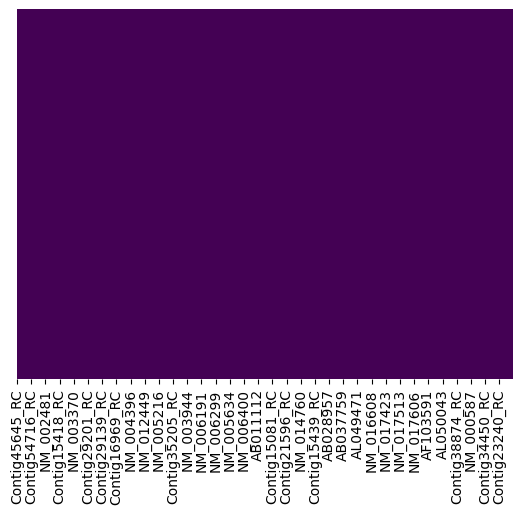

In [ ]:
# Lets see it visually.
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no missing data here..

<Axes: xlabel='Class', ylabel='count'>

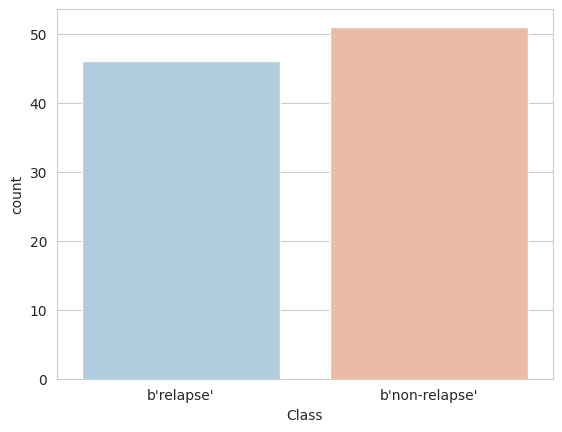

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', data= data1,palette = 'RdBu_r')

We have around 46-47 classes belongs to 'relapse' class and rest 52 belongs to 'non-relapse' class.

In [ ]:
# class values are in byte string format but we need them in integer format
# Converting them into string first
y = data1.Class  # label
def cvt(str):
  return str.decode("utf-8")

for st in range(len(y)):
  y[st] = cvt(y[st])

<ipython-input-8-6d71f590a003>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[st] = cvt(y[st])


In [ ]:
# Then convert them into integer
y.replace({"non-relapse": 0, "relapse": 1}, inplace= True)

In [ ]:
y = y.astype(float) # changing type of lable to float

In [ ]:
# Fetching our features columns
x = data1.drop(['Class'], axis=1)

**Though we gonna use kfold to split the data, because we have only 97 data points so it may cause overfitting issue, But we will also check with normal spliting first.**

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


In [ ]:
# Scale the training data if needed.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Normal LR

In [ ]:

lr = LogisticRegression().fit(X_train, y_train)

In [ ]:
pred = lr.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.5

We got 50 percent accuracy without feature selection

# Logitic Regression with L1 Regularization

In [ ]:
from sklearn.feature_selection import SelectFromModel
lre = SelectFromModel(LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=101)).fit(X_train, y_train)

Change the penlty (C) to see different results.

In [ ]:
lre.get_support()

array([False, False, False, ..., False, False, False])

In [ ]:
# Now make a list with the selected features
selected_feat = x_train.columns[(lre.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 24481
selected features: 12


In [ ]:
# the number of features which coefficient was shrank to zero:

np.sum(lre.estimator_.coef_ == 0)


24469

In [ ]:
# we can identify the removed features like this:

removed_feats = x_train.columns[(lre.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Contig45645_RC', 'Contig44916_RC', 'D25272', 'J00129',
       'Contig29982_RC', 'Contig26811', 'D25274', 'Contig36292', 'Contig42854',
       'Contig34839',
       ...
       'NM_000895', 'NM_000898', 'NM_000899', 'Contig20164_RC',
       'Contig8985_RC', 'Contig36062_RC', 'Contig35333_RC', 'Contig62037_RC',
       'AF067420', 'Contig15167_RC'],
      dtype='object', length=24469)

In [ ]:
# we can then remove the features from the training and testing set
# like this:

X_train_selected = lre.transform(sc.fit_transform(X_train))
X_test_selected = lre.transform(sc.transform(x_test))

X_train_selected.shape, X_test_selected.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


((77, 12), (20, 12))

Classifiers

In [ ]:
# Now checking with classifier
# from sklearn.linear_model import
# lr = LogisticRegression().fit(X_train_selected, y_train)
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train_selected,y_train)
dt_pred = dt.predict(X_test_selected)

print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81        12
         1.0       0.80      0.50      0.62         8

    accuracy                           0.75        20
   macro avg       0.77      0.71      0.72        20
weighted avg       0.76      0.75      0.74        20



In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected,y_train)
lda_pred = lda.predict(X_test_selected)

print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        12
         1.0       0.56      0.62      0.59         8

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.64        20
weighted avg       0.66      0.65      0.65        20



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train)
gnb_pred = gnb.predict(X_test_selected)

print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        12
         1.0       0.50      0.38      0.43         8

    accuracy                           0.60        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.59      0.60      0.59        20



In [ ]:
model_SVC= SVC()
model_SVC.fit(X_train_selected,y_train)
svc_pred = model_SVC.predict(X_test_selected)

print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.83      0.74        12
         1.0       0.60      0.38      0.46         8

    accuracy                           0.65        20
   macro avg       0.63      0.60      0.60        20
weighted avg       0.64      0.65      0.63        20



Logitic Regression with L2 Regularization

In [ ]:
# pred = lr.predict(X_test_selected)
# metrics.accuracy_score(y_test, pred)
# # classification_report()
# lr.score(X_test_selected, y_test)

In [ ]:
# predictions = lr.predict(X_test)

# train_score_lr = lr.score(X_train, y_train)
# test_score_lr = lr.score(X_test, y_test)

# print("The train score for lr model is {}".format(train_score_lr))
# print("The test score for lr model is {}".format(test_score_lr))


You can we got highest accuracy of 1 or 99.99 in trainig set and only 50% accuracy for test set. So we can see some serious overfitting issue here.

# REF

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


In [ ]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(estimator = lr, n_features_to_select=50, step=1)
rfe.fit_transform(X_train,y_train)
print(rfe.get_support())
print(rfe.ranking_)

[False False False ... False False False]
[23488 23123 23112 ... 15571  2396  1266]


In [ ]:
y_pred_rfe = rfe.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rfe)

NameError: ignored

# Feature Selection With Embedded Methods

These methods provides both the benifits of wrapper methods and filters while maintaining resonable computation cost.<br>
Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

## LASSO Regularization (L1)
Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the overfitting issue.<br>
Lasso or L1 has the property that can shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statistics import mean

In [ ]:
# lr = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=101).fit(x_train, y_train)
# model = SelectFromModel(lr, prefit=True)


# X_new = model.transform(x_train)
# # Drop columns which have value of all 0s.
# sel_cols = x_train.columns[X_new.var() != 0]
# print(len(sel_cols))


In [ ]:
# # List to maintain the cross-validation scores
# cross_val_scores_lasso = []

# # List to maintain the different values of Lambda
# Lambda = []

# # Loop to compute the cross-validation scores
# for i in range(1, 9):
#     lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
#     lassoModel.fit(X_train, y_train)
#     scores = cross_val_score(lassoModel, x, y, cv = 10)
#     avg_cross_val_score = mean(scores)*100
#     cross_val_scores_lasso.append(avg_cross_val_score)
#     Lambda.append(i * 0.25)

# # Loop to print the different values of cross-validation scores
# for i in range(0, len(Lambda)):
#     print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i]))

In [ ]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)

# Model Score
print("Model Score: ", lasso.score(X_test, y_test))

# Lasso Coefficient
lasso.coef_

Model Score:  -0.05949720203371456


array([ 0.,  0.,  0., ...,  0., -0.,  0.])

Lasso Regression Cross-validation

In [ ]:
from sklearn.linear_model import LassoCV
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(x, y)
#
# Create the model score
#
lasso_cv.score(x, y)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.160e-03, tolerance: 1.492e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.104e-03, tolerance: 1.521e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.805e-03, tolerance: 1.548e

Best Parameters: {'alpha': 0.1}
Best Score: 0.11907259352256164
